<div style="text-align: center; font-size: 44px; color: blue;">
    Projet 1 deep learning
</div>

<div style="font-weight: bold; font-size: 30px; text-align: left;">
    Mouhamadou Lamine Mar
</div>

<div style="position: fixed; bottom: 0; font-size: 24px;">
    DIC2 2024
</div>





<div style="color: red; font-size: 22px; font-weight: bold;">
    Contexte du Projet
</div>
<p>
    Ce projet s'inscrit dans le cadre de l'étude des <strong>bénéfices</strong> générés par une entreprise au cours d'une période donnée. 
    Analyser ces bénéfices est crucial pour comprendre la performance financière de l'entreprise, identifier les 
    tendances et les facteurs influençant la rentabilité, et formuler des stratégies pour maximiser les profits futurs.
</p>

<div style="color: red; font-size: 22px; font-weight: bold;">
    Importance de l'Étude
</div>
<p>
    Une étude approfondie des bénéfices permet non seulement de mesurer le succès économique de l'entreprise, mais 
    aussi de guider les décisions d'investissement et de gestion. En effectuant une analyse rigoureuse, nous pouvons 
    identifier les domaines qui nécessitent des améliorations et ceux qui peuvent être exploités davantage pour 
    augmenter les bénéfices.
</p>

<div style="color: red; font-size: 22px; font-weight: bold;">
    Méthodologie
</div>
<p>
    La méthodologie que nous allons adopter pour ce projet se décompose en plusieurs étapes :
</p>
<ul>
    <li><strong>Normalisation des données :</strong> Nous commencerons par normaliser les données afin de s'assurer 
        que toutes les variables sont sur une échelle comparable. Cela permet de réduire les biais dans le modèle 
        d'apprentissage.</li>
    <li><strong>Traitement avec TensorFlow :</strong> Dans un premier temps, nous utiliserons TensorFlow pour construire 
        et entraîner notre modèle de réseau de neurones. Cette étape permettra d'évaluer la performance du modèle avec 
        ce framework.</li>
    <li><strong>Traitement avec PyTorch :</strong> Ensuite, nous reproduirons le même processus avec PyTorch pour 
        comparer les résultats obtenus. Cette double approche nous aidera à choisir l'outil le plus performant et 
        adapté à notre problème.</li>
</ul>

<div style="color: red; font-size: 22px; font-weight: bold;">
    Conclusion
</div>
<p>
   Nous allons à la fin, proposer une conclusion à l'aide des résultats obtenus.
</p>

### Librairies 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler

### Librairies Tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam

2024-08-21 01:48:54.381305: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Librairies Pytorch

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

### Chargement du dataset et taille :

In [5]:
# Charger le dataset
data = pd.read_csv('dataset1.csv')

# Déterminer la taille du dataset
print("Taille du dataset:", data.shape)

Taille du dataset: (500, 15)


In [6]:
# Encoder la colonne 'CR'
label_encoder = LabelEncoder()
data['CR'] = label_encoder.fit_transform(data['CR'])

### Séparation des données et Conversion du DataFrame en numpy array

In [7]:
# Séparation des données en variables explicatives (X) et variable cible (y) et conversion a l'aide de .values
X = data.drop('Benefice', axis=1).values
y = data['Benefice'].values

In [8]:
# Normalisation des données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

### Séparation des données en ensembles d'entraînement et de test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

## Configuration du réseau de neurones 

## avec Tensorflow

In [10]:
# Définir le modèle
model = Sequential()

# Ajout des couches avec l'initialisation He Normal et des biais à 0.01
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones'))
model.add(Dense(32, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones'))
model.add(Dense(16, activation='relu', kernel_initializer=HeNormal(), bias_initializer='ones'))
model.add(Dense(1, activation='linear', kernel_initializer=HeNormal(), bias_initializer='ones'))  # pour une sortie continue

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',  # Mean Squared Error comme fonction de coût
              metrics=['mae', 'accuracy'])  # Mean Absolute Error et Accuracy comme métriques

# Visualiser le résumé du modèle
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

## avec Pytorch

In [18]:
modelP.to(device)

SimpleNN(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
)

In [49]:
# Définir le modèle
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        
        # Initialisation des poids avec He Normal et des biais à 0.01
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0.01)
        nn.init.kaiming_normal_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0.01)
        nn.init.kaiming_normal_(self.fc3.weight)
        nn.init.constant_(self.fc3.bias, 0.01)
        nn.init.kaiming_normal_(self.fc4.weight)
        nn.init.constant_(self.fc4.bias, 0.01)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialiser le modèle
input_size = X_train.shape[1]
modelP = SimpleNN(input_size=input_size)

# Fonction de coût
criterion = nn.MSELoss()

# Optimiseur
optimizer = optim.Adam(modelP.parameters(), lr=0.001)

## 3. Métriques adaptées et non adaptées
### Métriques adaptées :

##### 1 Mean Squared Error (MSE)
*Justification :* Comme nous traitons un problème de régression, MSE est une métrique qui pénalise les erreurs proportionnellement à leur carré, ce qui est utile pour capturer les grandes erreurs.
##### 2 Mean Absolute Error (MAE)
*Justification :* MAE est une métrique intuitive pour comprendre l'erreur moyenne en termes d'unités de la variable cible. Elle est moins sensible aux outliers comparée à MSE.
### Métriques non adaptées :

##### 1 Accuracy
*Justification :* L'accuracy est principalement utilisée pour des problèmes de classification, où les prédictions sont des catégories discrètes plutôt que des valeurs continues.
##### 2 Binary Cross-Entropy
*Justification :* La Binary Cross-Entropy est conçue pour les problèmes de classification binaire et ne s'applique pas à des sorties continues comme dans un problème de régression.

## 4. Entraînement du modèle

### avec Tensorflow

### avec Pytorch

In [50]:
# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convertir les données en FloatTensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialisation des listes pour stocker les métriques
train_losses = []
val_losses = []
train_mae = []
val_mae = []

num_epochs = 100
for epoch in range(num_epochs):
    modelP.train()
    epoch_train_loss = 0
    epoch_train_mae = 0
    
    # Entraînement
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = modelP(inputs)
        loss = criterion(outputs, targets)
        mae = torch.mean(torch.abs(outputs - targets))
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_mae += mae.item() * inputs.size(0)
    
    # Moyenne de la perte et MAE d'entraînement
    epoch_train_loss /= len(train_loader.dataset)
    epoch_train_mae /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    train_mae.append(epoch_train_mae)
    
    modelP.eval()
    epoch_val_loss = 0
    epoch_val_mae = 0
    
    # Validation
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = modelP(inputs)
            loss = criterion(outputs, targets)
            mae = torch.mean(torch.abs(outputs - targets))
            epoch_val_loss += loss.item() * inputs.size(0)
            epoch_val_mae += mae.item() * inputs.size(0)
    
    # Moyenne de la perte et MAE de validation
    epoch_val_loss /= len(val_loader.dataset)
    epoch_val_mae /= len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    val_mae.append(epoch_val_mae)
    
    # Affichons la perte pour vérifier la progression
    if (epoch + 1) % 10 == 0:  # Afficher tous les 10 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train MAE: {epoch_train_mae:.4f}, Val Loss: {epoch_val_loss:.4f}, Val MAE: {epoch_val_mae:.4f}')


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Train Loss: 529.2797, Train MAE: 21.1862, Val Loss: 534.4710, Val MAE: 21.3294
Epoch [20/100], Train Loss: 456.5087, Train MAE: 19.3493, Val Loss: 448.4304, Val MAE: 19.1885
Epoch [30/100], Train Loss: 338.2719, Train MAE: 15.9245, Val Loss: 315.0562, Val MAE: 15.2914
Epoch [40/100], Train Loss: 193.7606, Train MAE: 10.6777, Val Loss: 164.9992, Val MAE: 10.0079
Epoch [50/100], Train Loss: 117.8821, Train MAE: 8.0734, Val Loss: 95.8926, Val MAE: 8.1666
Epoch [60/100], Train Loss: 104.1116, Train MAE: 7.6512, Val Loss: 90.2802, Val MAE: 8.1417
Epoch [70/100], Train Loss: 94.0625, Train MAE: 7.0902, Val Loss: 86.9235, Val MAE: 7.9959
Epoch [80/100], Train Loss: 89.6431, Train MAE: 7.0371, Val Loss: 86.2854, Val MAE: 8.0629
Epoch [90/100], Train Loss: 85.4947, Train MAE: 6.9248, Val Loss: 85.2893, Val MAE: 8.0616
Epoch [100/100], Train Loss: 85.4051, Train MAE: 6.7796, Val Loss: 83.9566, Val MAE: 7.9674


## Visualisation des métriques et du loss

### avec Tensorflow

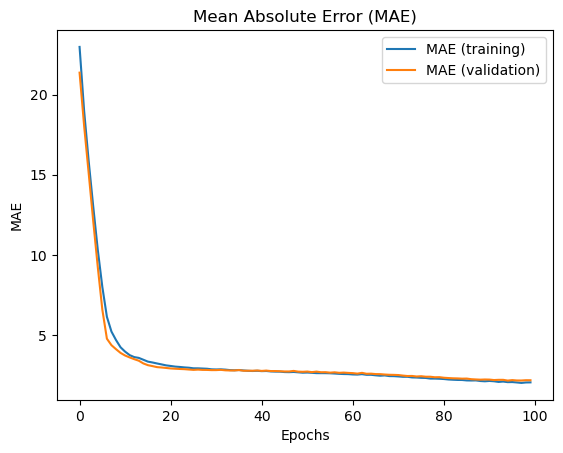

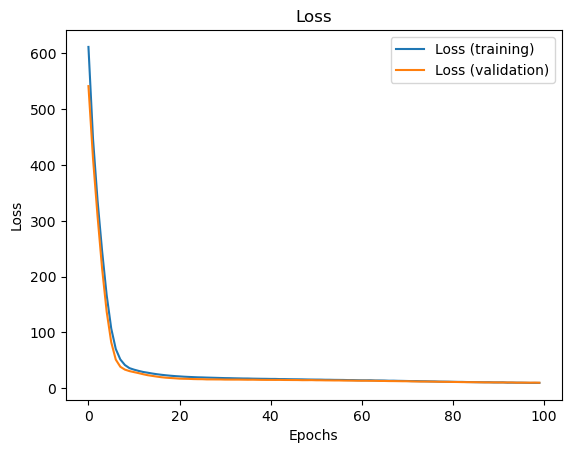

In [12]:
import matplotlib.pyplot as plt

# Plot metrics
plt.plot(history.history['mae'], label='MAE (training)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### avec Pytorch

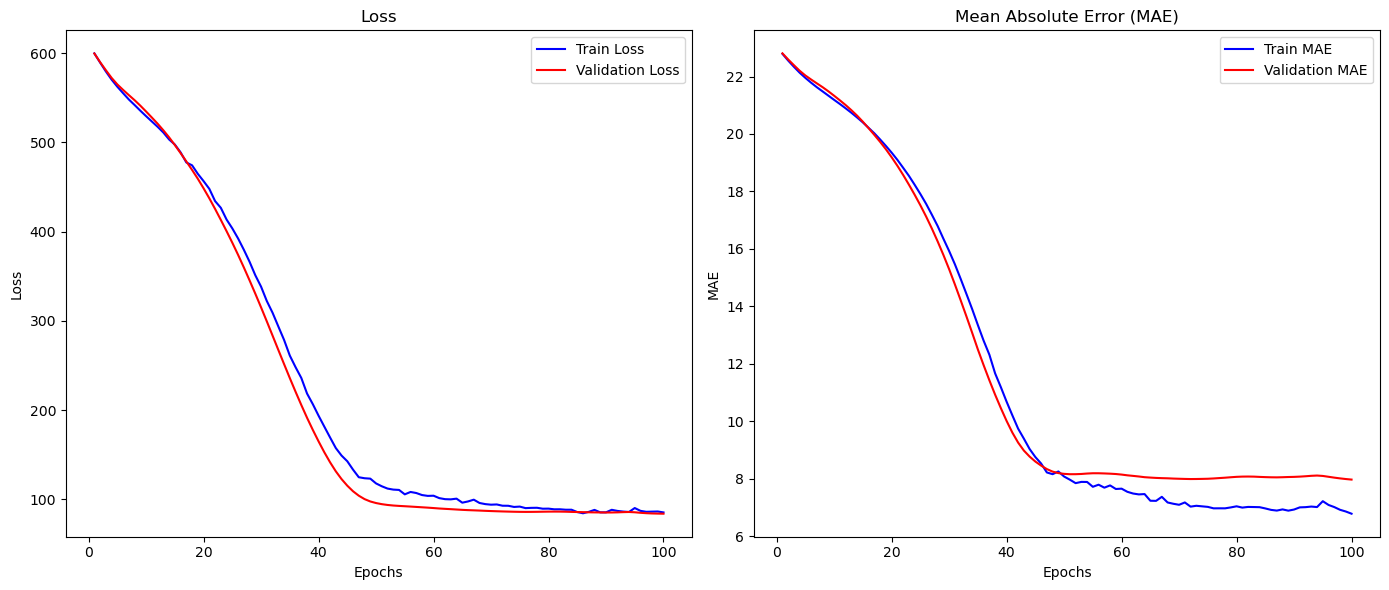

In [51]:
import matplotlib.pyplot as plt

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Tracer la perte (Loss)
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer l'erreur absolue moyenne (MAE)
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_mae, label='Train MAE', color='blue')
plt.plot(range(1, num_epochs + 1), val_mae, label='Validation MAE', color='red')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Prédiction avec le modèle

### avec Tensorflow

In [17]:
# Charger le dataset topredict1.csv
topredict_data = pd.read_csv('topredict1.csv')

# Remplacer toutes les valeurs de la colonne 'CR' par 0
if 'CR' in topredict_data.columns:
    topredict_data['CR'] = 0

# Normalisation des données à prédire
X_topredict = scaler.transform(topredict_data.values)

# Faire les prédictions avec TensorFlow
predictions_tf = model.predict(X_topredict)

# Afficher les prédictions TensorFlow
print("Prédictions avec TensorFlow :")
print(predictions_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prédictions avec TensorFlow :
[[21.50689 ]
 [17.022606]
 [18.30032 ]
 [25.75753 ]
 [ 9.348993]
 [18.042877]]


### avec Pytorch

In [ ]:
# Convertir en Tensor pour PyTorch
X_topredict_tensor = torch.FloatTensor(X_topredict)

# Mettre le modèle en mode évaluation
model.eval()

# Faire les prédictions avec PyTorch
with torch.no_grad():
    predictions_pt = model(X_topredict_tensor)

# Convertir les prédictions en numpy array pour l'interprétation ou l'exportation
predictions_pt_numpy = predictions_pt.numpy()

# Afficher les prédictions PyTorch
print("Prédictions avec PyTorch :")
print(predictions_pt_numpy)

<h2 style=color:red;>Conclusion</h2>

<p>Le modèle de réseau de neurones que nous avons développé a démontré une convergence efficace, atteignant des résultats prometteurs dans le processus d'apprentissage. Le réseau se compose de quatre couches entièrement connectées, avec une architecture progressive qui réduit le nombre de neurones à chaque couche suivante, ce qui contribue à une meilleure généralisation. Les spécifications des couches sont les suivantes :</p>

<ul>
    <li><strong>Dense</strong> (64 neurones, 960 paramètres)</li>
    <li><strong>Dense_1</strong> (32 neurones, 2,080 paramètres)</li>
    <li><strong>Dense_2</strong> (16 neurones, 528 paramètres)</li>
    <li><strong>Dense_3</strong> (1 neurone, 17 paramètres)</li>
</ul>

<p>Pour optimiser les performances, nous avons utilisé l'initialisation He Normal pour les poids des couches et des biais initialisés à 0.01. Cette approche a contribué à une stabilisation rapide et efficace de l'apprentissage.</p>

<p>Les résultats expérimentaux montrent que le modèle converge bien, ce qui est indicatif d'une bonne capacité à généraliser sur les données. Les choix d'architecture et d'initialisation semblent avoir été efficaces, permettant au modèle de trouver un équilibre entre complexité et performance.</p>
